In [2]:
%matplotlib notebook
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np


In [3]:
train_set= [
[2,2,19],
[2,3,32],
[1,5,17]
]

t= train_set[0]
file_name= '../data/extracted/%s-%s-%s.spk.txt'%(t[0],t[1],t[2])
st,gid=np.loadtxt(file_name).T
sc,bins = np.histogram(st,np.arange(0,np.max(st),0.02))

In [4]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector
from IPython.display import display
import numpy as np

# Generate a sample time series data
# np.random.seed(42)
# timestamps = np.linspace(0, 10, 100)
# data = np.sin(timestamps) + 0.1 * np.random.randn(len(timestamps))

# Arrays to store the labeled timestamp windows
labeled_windows = []

# Create a figure and axis
fig, ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]}, figsize=(8, 3),sharex=True)
line, = ax[0].plot(st, gid,'|' ,label='st',ms= 0.01,linewidth=2)
line, = ax[1].plot(bins[1:], sc, label='sc')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Electrodes')
ax[0].set_title('Data%s'%file_name)

# Function to handle span selection (mouse drag)
def onselect(xmin, xmax):
    labeled_windows.append((xmin, xmax))
    with output:
        print(f"Labeled Window: {xmin} - {xmax}")

# Initialize the span selector without span_stays
span = SpanSelector(ax[0], onselect, 'horizontal', useblit=True, minspan=0.1)

# Show the plot
plt.show()

# Output widget for displaying labeled windows
output = widgets.Output()

# Button to display the labeled windows array
def display_labeled_windows():
    with output:
        print("Labeled Windows Array:", labeled_windows)

display_button = widgets.Button(description="Show Labeled Windows")
display_button.on_click(lambda x: display_labeled_windows())

# Display the output and button
display(widgets.VBox([display_button, output]))

<IPython.core.display.Javascript object>

NameError: name 'st' is not defined

<IPython.core.display.Javascript object>


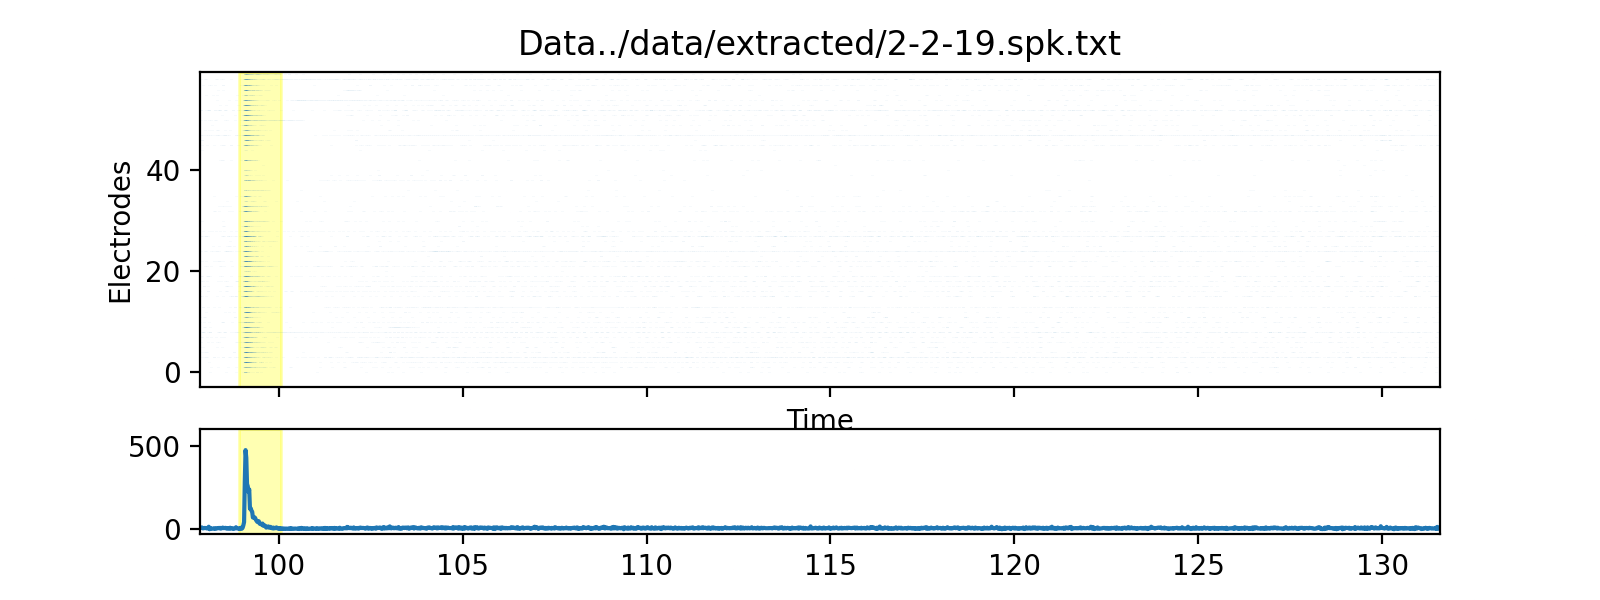

In [58]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector
from IPython.display import display
import numpy as np

# Arrays to store the labeled timestamp windows
labeled_windows = []
highlighted_regions = []

# Create a figure and axis
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8, 3), sharex=True)
# Use your own data here
line, = ax[0].plot(st, gid, '|', label='st', ms=0.01, linewidth=2)
line, = ax[1].plot(bins[1:], sc, label='sc')

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Electrodes')
ax[0].set_title('Data%s' % file_name)

# Output widget for displaying labeled windows
output = widgets.Output()

# Create a list of text widgets for each labeled window
label_widgets = []
delete_buttons = []

# Function to delete a labeled window
def delete_labeled_window(index):
    # Remove the window from the list
    labeled_windows.pop(index)
    update_label_list()

# Function to update the scrollable list of labels and plot highlighted regions
def update_label_list():
    # Clear the old widgets
    label_widgets.clear()
    delete_buttons.clear()
    
    # Remove existing highlights
    for region in highlighted_regions:
        region.remove()
    highlighted_regions.clear()
    
    # Create a new widget for each labeled window and highlight it on the plot
    for i, (xmin, xmax) in enumerate(labeled_windows):
        # Create editable fields for the label window with fixed width
        start_label = widgets.FloatText(value=xmin, description=f'Start {i+1}', layout=widgets.Layout(width='100px'))
        end_label = widgets.FloatText(value=xmax, description=f'End {i+1}', layout=widgets.Layout(width='100px'))
        
        # Add a delete button for each label window with fixed width
        delete_button = widgets.Button(description='Delete', layout=widgets.Layout(width='70px'))
        delete_button.on_click(lambda b, i=i: delete_labeled_window(i))
        
        # Create a horizontal box layout for each pair of labels and the delete button
        label_box = widgets.HBox([start_label, end_label, delete_button], layout=widgets.Layout(flex_flow='row', padding='5px'))
        
        # Store the widget in the list
        label_widgets.append(label_box)
        delete_buttons.append(delete_button)
        
        # Highlight the labeled region on both subplots
        region_top = ax[0].axvspan(xmin, xmax, color='yellow', alpha=0.3)
        region_bottom = ax[1].axvspan(xmin, xmax, color='yellow', alpha=0.3)
        
        # Store the highlighted regions to remove later if needed
        highlighted_regions.append(region_top)
        highlighted_regions.append(region_bottom)
    
    # Redraw the plot to show the highlights
    plt.draw()
    
    # Display all labels in the scrollable box as one unified scrollable section
    label_box_layout.children = label_widgets

# Function to handle span selection (mouse drag)
def onselect(xmin, xmax):
    labeled_windows.append((xmin, xmax))
    update_label_list()
    with output:
        print(f"Labeled Window: {xmin} - {xmax}")

# Initialize the span selector without span_stays
span = SpanSelector(ax[1], onselect, 'horizontal', useblit=True, minspan=0.1)

# Show the plot
plt.show()

# Scrollable widget for label editing with fixed height
label_box_layout = widgets.HBox()  # Contains all label widgets
# scrollable_label_box = widgets.Box([label_box_layout], layout=widgets.Layout(
#     max_height='500px',  # Fixed height
#     overflow_y='0',   # Enable vertical scrolling
#     width='650px'        # Fixed width for the scrollable area
# ))

scrollable_label_box = widgets.Box(
    [label_box_layout],
    layout=widgets.Layout(
        overflow_x='auto',   # Enable horizontal scrolling
        overflow_y='auto',  # Disable vertical scrolling
        width='400px',       # Set a fixed width
        height='100px'       # Set a fixed height
    )
)
# Button to display the labeled windows array
def display_labeled_windows():
    with output:
        print("Labeled Windows Array:", labeled_windows)

display_button = widgets.Button(description="Show Labeled Windows")
display_button.on_click(lambda x: display_labeled_windows())

# Display the output, button, and the scrollable box of labels (fixed size, no rescaling)
display(widgets.VBox([display_button, scrollable_label_box, output]))

In [62]:
import ipywidgets as widgets
from IPython.display import display

# Example list of events with start and end times
events = [(1.0, 3.0), (5.5, 8.2), (10.3, 12.0), (13.0, 14.5), (15.0, 17.0), (18.0, 19.5),
         (1.0, 3.0), (5.5, 8.2), (10.3, 12.0), (13.0, 14.5), (15.0, 17.0), (18.0, 19.5),
          (1.0, 3.0), (5.5, 8.2), (10.3, 12.0), (13.0, 14.5), (15.0, 17.0), (18.0, 19.5),
          (1.0, 3.0), (5.5, 8.2), (10.3, 12.0), (13.0, 14.5), (15.0, 17.0), (18.0, 19.5),
          (1.0, 3.0), (5.5, 8.2), (10.3, 12.0), (13.0, 14.5), (15.0, 17.0), (18.0, 19.5)
         ]

# Create a Select widget to display all events
select_event = widgets.Select(
    options=[f"Event {i+1}: {start} - {end}" for i, (start, end) in enumerate(events)],
    description='Events',
    layout=widgets.Layout(width='300px', height='200px')  # Scrollable select box
)

# FloatText widgets to edit the selected event's start and end times
start_text = widgets.FloatText(description='Start', layout=widgets.Layout(width='150px'))
end_text = widgets.FloatText(description='End', layout=widgets.Layout(width='150px'))

# Button to update the event in the list
update_button = widgets.Button(description='Update Event')

# Output widget to display the updated event list
output = widgets.Output()

# Function to update the "start" and "end" fields when an event is selected
def on_event_select(change):
    index = select_event.index  # Get the index of the selected event
    if index >= 0:
        start, end = events[index]  # Get the start and end of the selected event
        start_text.value = start
        end_text.value = end

# Attach the callback to the Select widget
select_event.observe(on_event_select, names='value')

# Function to update the event list when the update button is clicked
def on_update_button_click(b):
    index = select_event.index
    if index >= 0:
        # Update the selected event's start and end times
        events[index] = (start_text.value, end_text.value)
        # Update the options in the Select widget
        select_event.options = [f"Event {i+1}: {start} - {end}" for i, (start, end) in enumerate(events)]
        # Optionally print the updated list to output
        with output:
            output.clear_output()
            print(f"Updated Event {index+1}: Start = {start_text.value}, End = {end_text.value}")

# Attach the update function to the button
update_button.on_click(on_update_button_click)

# Display the widgets
display(select_event, start_text, end_text, update_button, output)

Select(description='Events', layout=Layout(height='200px', width='300px'), options=('Event 1: 1.0 - 3.0', 'Eve…

FloatText(value=0.0, description='Start', layout=Layout(width='150px'))

FloatText(value=0.0, description='End', layout=Layout(width='150px'))

Button(description='Update Event', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>


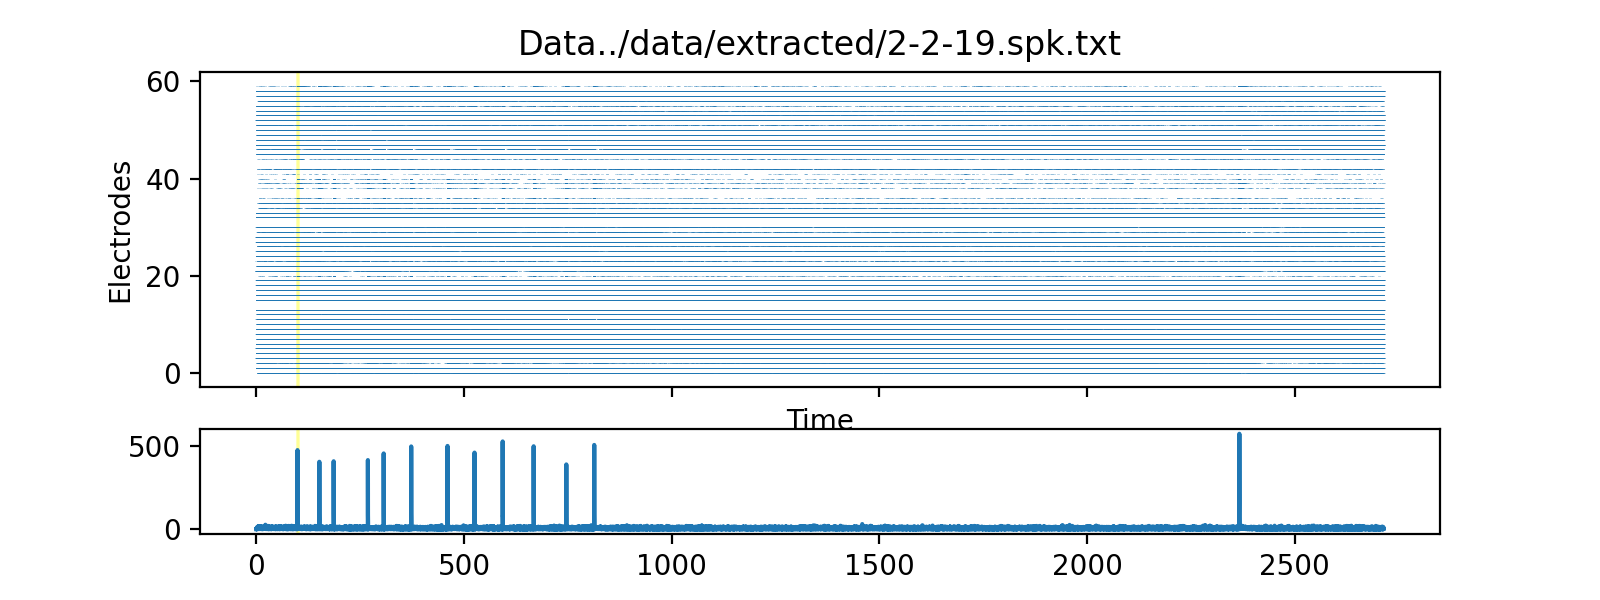

Select(description='Events', layout=Layout(height='200px', width='300px'), options=(), value=None)

FloatText(value=0.0, description='Start', layout=Layout(width='150px'))

FloatText(value=0.0, description='End', layout=Layout(width='150px'))

Button(description='Update Event', style=ButtonStyle())

Output()

In [65]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector
from IPython.display import display
import numpy as np

# Arrays to store the labeled timestamp windows
labeled_windows = []


highlighted_regions = []

# Create a figure and axis
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8, 3), sharex=True)
# Use your own data here
line, = ax[0].plot(st, gid, '|', label='st', ms=0.1, linewidth=2)
line, = ax[1].plot(bins[1:], sc, label='sc')

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Electrodes')
ax[0].set_title('Data%s' % file_name)

# Output widget for displaying labeled windows
output = widgets.Output()

# Function to delete a labeled window
def delete_labeled_window(index):
    # Remove the window from the list
    labeled_windows.pop(index)
    update_label_list()

# Function to update the scrollable list of labels and plot highlighted regions
def update_label_list():
    # Remove existing highlights
    for region in highlighted_regions:
        region.remove()
    highlighted_regions.clear()

    # Create a new select widget options and highlight on the plot
    options = []
    for i, (xmin, xmax) in enumerate(labeled_windows):
        options.append(f"Event {i+1}: {xmin:.2f} - {xmax:.2f}")
        
        # Highlight the labeled region on both subplots
        region_top = ax[0].axvspan(xmin, xmax, color='yellow', alpha=0.3)
        region_bottom = ax[1].axvspan(xmin, xmax, color='yellow', alpha=0.3)
        
        # Store the highlighted regions to remove later if needed
        highlighted_regions.append(region_top)
        highlighted_regions.append(region_bottom)

    # Update the Select widget
    select_event.options = options
    
    # Redraw the plot to show the highlights
    plt.draw()

# Function to handle span selection (mouse drag)
def onselect(xmin, xmax):
    labeled_windows.append((xmin, xmax))
    update_label_list()
    with output:
        print(f"Labeled Window: {xmin} - {xmax}")

# Initialize the span selector without span_stays
span = SpanSelector(ax[1], onselect, 'horizontal', useblit=True, minspan=0.1)

# Show the plot
# plt.show()
# Select widget for displaying events
select_event = widgets.Select(
    options=[],
    description='Events',
    layout=widgets.Layout(width='300px', height='200px')  # Scrollable select box
)
# FloatText widgets to edit the selected event's start and end times
start_text = widgets.FloatText(description='Start', layout=widgets.Layout(width='150px'))
end_text = widgets.FloatText(description='End', layout=widgets.Layout(width='150px'))

# Button to update the event in the list
update_button = widgets.Button(description='Update Event')

# Function to update the "start" and "end" fields when an event is selected
def on_event_select(change):
    index = select_event.index  # Get the index of the selected event
    if index >= 0:
        start, end = labeled_windows[index]  # Get the start and end of the selected event
        start_text.value = start
        end_text.value = end

# Attach the callback to the Select widget
select_event.observe(on_event_select, names='value')

# Function to update the event list when the update button is clicked
def on_update_button_click(b):
    index = select_event.index
    if index >= 0:
        # Update the selected event's start and end times
        labeled_windows[index] = (start_text.value, end_text.value)
        # Update the Select widget options
        update_label_list()
        # Optionally print the updated list to output
        with output:
            output.clear_output()
            print(f"Updated Event {index+1}: Start = {start_text.value}, End = {end_text.value}")

# Attach the update function to the button
update_button.on_click(on_update_button_click)

# Display the widgets
display(select_event, start_text, end_text, update_button, output)

# Button to display the labeled windows array
def display_labeled_windows():
    with output:
        print("Labeled Windows Array:", labeled_windows)

display_button = widgets.Button(description="Show Labeled Windows")
display_button.on_click(lambda x: display_labeled_windows())

# Display the output, button, and the scrollable box of labels (fixed size, no rescaling)
display(widgets.VBox([display_button, select_event, start_text, end_text, update_button, output]))

In [6]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector
from IPython.display import display
import numpy as np
import json

# Arrays to store the labeled timestamp windows
labeled_windows = []
highlighted_regions = []

# Sample file name (use your actual file name here)
### TODO: CHANGE HERE TO RECORD EVENTS IN A MEANINGFUL FOLDER
file_name = "detected_events"
st  = np.random.randint(0,1000,size=1000)
gid = np.random.randint(0,10,size=1000)

# Create a figure and axis
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8, 3), sharex=True)
# Use your own data here
line, = ax[0].plot(st, gid, '|', label='st', ms=0.01, linewidth=2)
# line, = ax[1].plot(bins[1:], sc, label='sc')

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Electrodes')
ax[0].set_title('Data%s' % file_name)

# Output widget for displaying labeled windows
output = widgets.Output()

# Function to delete a labeled window
def delete_labeled_window():
    index = select_event.index  # Get the selected event index
    if index >= 0:
        # Remove the event from the list
        labeled_windows.pop(index)
        update_label_list()

# Function to update the scrollable list of labels and plot highlighted regions
def update_label_list():
    # Remove existing highlights
    for region in highlighted_regions:
        region.remove()
    highlighted_regions.clear()

    # Create a new select widget options and highlight on the plot
    options = []
    for i, (xmin, xmax) in enumerate(labeled_windows):
        options.append(f"Event {i+1}: {xmin:.2f} - {xmax:.2f}")
        
        # Highlight the labeled region on both subplots
        region_top = ax[0].axvspan(xmin, xmax, color='yellow', alpha=0.3)
        region_bottom = ax[1].axvspan(xmin, xmax, color='yellow', alpha=0.3)
        
        # Store the highlighted regions to remove later if needed
        highlighted_regions.append(region_top)
        highlighted_regions.append(region_bottom)

    # Update the Select widget
    select_event.options = options
    
    # Redraw the plot to show the highlights
    plt.draw()

# Function to handle span selection (mouse drag)
def onselect(xmin, xmax):
    labeled_windows.append((xmin, xmax))
    update_label_list()
    with output:
        print(f"Labeled Window: {xmin} - {xmax}")

# Initialize the span selector without span_stays
span = SpanSelector(ax[1], onselect, 'horizontal', useblit=True, minspan=0.1)

# Show the plot
plt.show()

# Select widget for displaying events
select_event = widgets.Select(
    options=[],
    description='Events',
    layout=widgets.Layout(width='300px', height='200px')  # Scrollable select box
)

# FloatText widgets to edit the selected event's start and end times
start_text = widgets.FloatText(description='Start', layout=widgets.Layout(width='150px'))
end_text = widgets.FloatText(description='End', layout=widgets.Layout(width='150px'))

# Button to update the event in the list
update_button = widgets.Button(description='Update Event')

# Button to delete the selected event
delete_button = widgets.Button(description='Delete Event', button_style='danger')

# Function to update the "start" and "end" fields when an event is selected
def on_event_select(change):
    index = select_event.index  # Get the index of the selected event
    if index >= 0:
        start, end = labeled_windows[index]  # Get the start and end of the selected event
        start_text.value = start
        end_text.value = end

# Attach the callback to the Select widget
select_event.observe(on_event_select, names='value')

# Function to update the event list when the update button is clicked
def on_update_button_click(b):
    index = select_event.index
    if index >= 0:
        # Update the selected event's start and end times
        labeled_windows[index] = (start_text.value, end_text.value)
        # Update the Select widget options
        update_label_list()
        # Optionally print the updated list to output
        with output:
            output.clear_output()
            print(f"Updated Event {index+1}: Start = {start_text.value}, End = {end_text.value}")

# Attach the update function to the button
update_button.on_click(on_update_button_click)

# Attach the delete function to the delete button
delete_button.on_click(lambda x: delete_labeled_window())

# Button to display the labeled windows array
def display_labeled_windows():
    with output:
        output.clear_output()
        print("Labeled Windows Array:", labeled_windows)

display_button = widgets.Button(description="Show Labeled Windows")
display_button.on_click(lambda x: display_labeled_windows())

# Function to save the labeled windows as a JSON file
def save_labeled_windows():
    data = {"events": labeled_windows}
    filename = f"{file_name}.json"
    
    with open(filename, "w") as f:
        json.dump(data, f)
    
    with output:
        output.clear_output()
        print(f"Saved events to {filename}")

# Save button widget
save_button = widgets.Button(description="Save Events", button_style='success')
save_button.on_click(lambda x: save_labeled_windows())

# Display all widgets in a single layout once (no duplicates)
display(widgets.VBox([display_button, select_event, start_text, end_text, update_button, delete_button, save_button, output]))

<IPython.core.display.Javascript object>